In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
import numpy as np
from numpy import load
import matplotlib.pyplot as plt

In [ ]:
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from matplotlib import pyplot

In [ ]:
def load_images(path,size=(256,512)):
  src_list, tar_list = list(),list()
  for filename in listdir(path):
    print(filename)
    img_pixels = load_img(path + filename,target_size=size)
    pixel_array = img_to_array(img_pixels)

    sat_img, map_img = pixel_array[:,:256] , pixel_array[:,256:]
    src_list.append(sat_img)
    tar_list.append(map_img)
  
  return [asarray(src_list),asarray(tar_list)]

In [ ]:
path = "/content/gdrive/My Drive/maps/train/"
[src_images,tar_images] = load_images(path)

702.jpg
250.jpg
663.jpg
674.jpg
436.jpg
964.jpg
133.jpg
577.jpg
338.jpg
324.jpg
150.jpg
804.jpg
998.jpg
92.jpg
628.jpg
986.jpg
199.jpg
337.jpg
734.jpg
328.jpg
993.jpg
553.jpg
585.jpg
153.jpg
388.jpg
966.jpg
895.jpg
1078.jpg
138.jpg
1047.jpg
231.jpg
369.jpg
372.jpg
434.jpg
190.jpg
119.jpg
197.jpg
38.jpg
937.jpg
657.jpg
840.jpg
603.jpg
508.jpg
880.jpg
921.jpg
418.jpg
230.jpg
483.jpg
358.jpg
918.jpg
1001.jpg
693.jpg
439.jpg
277.jpg
409.jpg
488.jpg
717.jpg
170.jpg
695.jpg
252.jpg
361.jpg
189.jpg
313.jpg
830.jpg
259.jpg
1074.jpg
51.jpg
161.jpg
740.jpg
299.jpg
991.jpg
561.jpg
93.jpg
61.jpg
1073.jpg
484.jpg
562.jpg
997.jpg
69.jpg
194.jpg
79.jpg
806.jpg
283.jpg
771.jpg
193.jpg
1058.jpg
643.jpg
287.jpg
507.jpg
1022.jpg
180.jpg
146.jpg
596.jpg
102.jpg
848.jpg
449.jpg
422.jpg
205.jpg
969.jpg
538.jpg
981.jpg
209.jpg
893.jpg
521.jpg
134.jpg
448.jpg
909.jpg
645.jpg
162.jpg
1052.jpg
96.jpg
870.jpg
1068.jpg
68.jpg
869.jpg
1051.jpg
775.jpg
413.jpg
872.jpg
25.jpg
884.jpg
898.jpg
598.jpg
539.jpg
547.jpg


FileNotFoundError: ignored

In [ ]:
print('loaded images shape \n','satellite image shape',src_images.shape,'\n','map images shape',tar_images.shape)

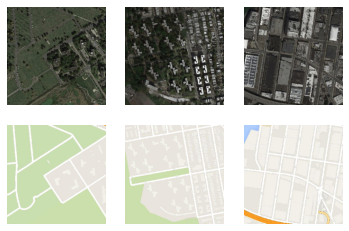

In [ ]:
data = load(compressed_data_filename)
src_img, tar_img = data['arr_0'],data['arr_1']
n_samples = 3
for i in range(n_samples):
	plt.subplot(2, n_samples, 1 + i)
	plt.axis('off')
	plt.imshow(src_img[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	plt.subplot(2, n_samples, 1 + n_samples + i)
	plt.axis('off')
	plt.imshow(tar_img[i].astype('uint8'))
plt.show()

In [ ]:
compressed_data_filename = '/content/gdrive/My Drive/maps/train/maps_256.npz'
savez_compressed(compressed_data_filename,src_images,tar_images)
print('Saved dataset',compressed_data_filename)

# 1

In [ ]:
# load and prepare training images
def load_real_samples(filename):
	# load compressed arrays
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	# return in reverse order
	return [X1, X2]

In [ ]:
def define_discriminator(image_shape):
  init = RandomNormal(stddev=0.02)

  in_src_img = Input(shape=image_shape)
  in_tar_img = Input(shape=image_shape)
  merged = Concatenate()([in_src_img,in_tar_img])

  d = Conv2D(filters=64,kernel_size=(4,4),strides=(2,2),kernel_initializer=init,padding='same')(merged)
  d = LeakyReLU(0.2)(d)

  d = Conv2D(filters=128,kernel_size=(4,4),strides=(2,2),padding='same',kernel_initializer=init)(d)
  d = BatchNormalization()(d)
  d = LeakyReLU(0.2)(d)

  d = Conv2D(filters=256,kernel_size=(4,4),strides=(2,2),padding='same',kernel_initializer=init)(d)
  d = BatchNormalization()(d)
  d = LeakyReLU(0.2)(d)

  d = Conv2D(filters=512,kernel_size=(4,4),strides=(2,2),padding='same',kernel_initializer=init)(d)
  d = BatchNormalization()(d)
  d = LeakyReLU(0.2)(d)

  d = Conv2D(filters=512,kernel_size=(4,4),padding='same',kernel_initializer=init)(d)
  d = BatchNormalization()(d)
  d = LeakyReLU(0.2)(d)

  d = Conv2D(1,(4,4),padding='same',kernel_initializer=init)(d)
  patch_out = Activation('sigmoid')(d)

  model = Model([in_src_img,in_tar_img],patch_out)

  opt = Adam(lr=0.0002,beta_1=0.5)

  model.compile(loss='binary_crossentropy',optimizer=opt, loss_weights=[0.5])

  return model



In [ ]:
def encoder_block(layer_in,n_filters,batch_norm=True):
  init = RandomNormal(stddev=0.02)

  g = Conv2D(n_filters,(4,4),strides=(2,2),padding='same',kernel_initializer=init)(layer_in)
  if batch_norm:
    g = BatchNormalization()(g,training=True)
  g = LeakyReLU(0.2)(g)
  return g

def decoder_block(layer_in,skip_in,n_filters,dropout=True):
  init = RandomNormal(stddev=0.02)

  g = Conv2DTranspose(n_filters,(4,4),strides=(2,2),padding='same',kernel_initializer=init)(layer_in)
  g = BatchNormalization()(g,training=True)
  if dropout:
    g = Dropout(0.5)(g,training=True)
  g = Concatenate()([g,skip_in])
  g = Activation('relu')(g)
  return g


In [ ]:
def define_generator(image_shape=(256,256,3)):
  init = RandomNormal(stddev=0.02)

  input_image = Input(shape=image_shape)

  e1 = encoder_block(input_image,64,batch_norm=False)
  e2 = encoder_block(e1,128)
  e3 = encoder_block(e2,256)
  e4 = encoder_block(e3,512)
  e5 = encoder_block(e4,512)
  e6 = encoder_block(e5,512)
  e7 = encoder_block(e6,512)

  b = Conv2D(512,(4,4),strides=(2,2),padding='same',kernel_initializer=init)(e7)
  b = Activation('relu')(b)

  d1 = decoder_block(b,e7,512)
  d2 = decoder_block(d1,e6,512)
  d3 = decoder_block(d2,e5,512)
  d4 = decoder_block(d3,e4,512,dropout=False)
  d5 = decoder_block(d4,e3,256,dropout=False)
  d6 = decoder_block(d5,e2,128,dropout=False)
  d7 = decoder_block(d6,e1,64,dropout=False)

  g = Conv2DTranspose(3,(4,4),strides=(2,2),padding='same',kernel_initializer=init)(d7)
  output_image = Activation('tanh')(g)

  model = Model(input_image,output_image)

  return model

In [ ]:
def define_gan(g_model,d_model,image_shape):
  d_model.trainable = False
  in_src = Input(shape=image_shape)
  gen_out = g_model(in_src)
  dis_out = d_model([in_src,gen_out])

  model = Model(in_src,[dis_out,gen_out])
  opt = Adam(lr=0.0002,beta_1=0.5)
  model.compile(loss=['binary_crossentropy','mae'],optimizer=opt,loss_weights=[1,100])
  return model

In [ ]:
def generate_real_samples(dataset,n_samples,patch_shape):
  trainA,trainB = dataset

  ix = randint(0,trainA.shape[0],n_samples)

  X1,X2 = trainA[ix],trainB[ix]
  y = ones((n_samples,patch_shape,patch_shape,1))

  return [X1,X2],y


In [ ]:
def generate_fake_samples(g_model,samples,patch_shape):
  X = g_model.predict(samples)
  y = zeros((len(X),patch_shape,patch_shape,1))

  return X,y

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
def summary(g_model,dataset,n_samples=9):
  [X_RealA,X_RealB],_ = generate_real_samples(dataset,n_samples,1)

  generated_images = generate_fake_samples(g_model,X_RealA,1)
  plt.figure(figsize=(8, 8), num=2)
  gs1 = gridspec.GridSpec(3, 3)
  gs1.update(wspace=0, hspace=0)

  for i in range(n_samples):
    ax1 = plt.subplot(gs1[i])
    ax1.set_aspect('equal')
    image = generated_images[0][i,:,:,:]
    image += 1
    image *= 127.5
    fig = plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
  
  plt.tight_layout()
  plt.pause(0.0000000001)
  plt.show()

In [ ]:
def summarize_performance(step, g_model, dataset, n_samples=3):
	# select a sample of input images
	[X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
	# generate a batch of fake samples
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to [0,1]
	X_realA = (X_realA + 1) / 2.0
	X_realB = (X_realB + 1) / 2.0
	X_fakeB = (X_fakeB + 1) / 2.0
	# plot real source images
	print("---------SATELLITE IMAGES-----------")
	for i in range(n_samples):
		# pyplot.subplot(3, n_samples, 1 + i)
		# pyplot.axis('off')
		# pyplot.imshow(X_realA[i])
		print(type(X_realA[i]))
		cv2_imshow(X_realA[i])

	# plot generated target image
	print("---------Generated MAP IMAGES-----------")
	for i in range(n_samples):
		# pyplot.subplot(3, n_samples, 1 + n_samples + i)
		# pyplot.axis('off')
		# pyplot.imshow(X_fakeB[i])
		cv2_imshow(X_fakeB[i])
	# plot real target image
	print("---------REAL MAP IMAGES-----------")
	for i in range(n_samples):
		# pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
		# pyplot.axis('off')
		# pyplot.imshow(X_realB[i])
		cv2_imshow(X_realB[i])
	# save plot to file
	# pyplot.show()

In [ ]:
def train(d_model,g_model,gan_model,dataset,n_epochs=100, n_batch=1):
  n_patch = d_model.output_shape[1]
  trainA, trainB = dataset
  batch_per_epoch = int(len(trainA)/n_batch)
  n_steps = n_epochs * batch_per_epoch

  for i in range(n_steps):
    [X_realA, X_realB], y_real = generate_real_samples(dataset,n_batch,n_patch)
    
    X_fakeB, y_fake = generate_fake_samples(g_model,X_realA,n_patch)

    d1_loss = d_model.train_on_batch([X_realA,X_realB],y_real)
    d2_loss = d_model.train_on_batch([X_realA,X_fakeB],y_fake)

    g_loss,_,_ = gan_model.train_on_batch(X_realA,[y_real,X_realB])

    print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d1_loss, d2_loss, g_loss))
    if (i+1) % (batch_per_epoch * 10) == 0:
      print("Performance")
      summary(i, g_model, dataset)
    



In [ ]:
dataset = load_real_samples('/content/gdrive/My Drive/maps/maps_256.npz')

In [ ]:
print('Loaded', dataset[0].shape, dataset[1].shape)

Loaded (1096, 256, 256, 3) (1096, 256, 256, 3)


In [ ]:
image_shape = dataset[0].shape[1:]

In [ ]:
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)

gan_model = define_gan(g_model,d_model,image_shape)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, d1[0.268] d2[0.065] g[10.352]
>2, d1[0.022] d2[0.217] g[12.217]
>3, d1[0.270] d2[0.033] g[10.519]
>4, d1[0.009] d2[0.135] g[11.398]
>5, d1[0.086] d2[0.030] g[11.313]
>6, d1[0.079] d2[0.056] g[10.086]
>7, d1[0.012] d2[0.061] g[11.100]
>8, d1[0.054] d2[0.086] g[11.384]
>9, d1[0.037] d2[0.037] g[11.230]
>10, d1[0.079] d2[0.018] g[11.042]
>11, d1[0.039] d2[0.109] g[11.484]
>12, d1[0.032] d2[0.031] g[11.550]
>13, d1[0.088] d2[0.091] g[11.122]
>14, d1[0.030] d2[0.050] g[11.468]
>15, d1[0.089] d2[0.052] g[11.581]
>16, d1[0.021] d2[0.118] g[12.846]
>17, d1[0.138] d2[0.088] g[11.765]
>18, d1[0.019] d2[0.026] g[12.355]
>19, d1[0.119] d2[0.047] g[10.585]
>20, d1[0.164] d2[0.501] g[13.368]
>21, d1[0.407] d2[0.032] g[10.745]
>22, d1[0.020] d2[0.123] g[11.463]
>23, d1[0.061] d2[0.034] g[11.421]
>24, d1[0.025] d2[0.028] g[11.961]
>25, d1[0.035] d2[0.035] g[10.413]
>26, d1[0.003] d2[0.017] g[12.652]
>27, d1[0.036] d2[0.036] g[11.132]
>28, d1[0.059] d2[0.059] g[11.109]
>29, d1[0.016] d2[0.076] g[11

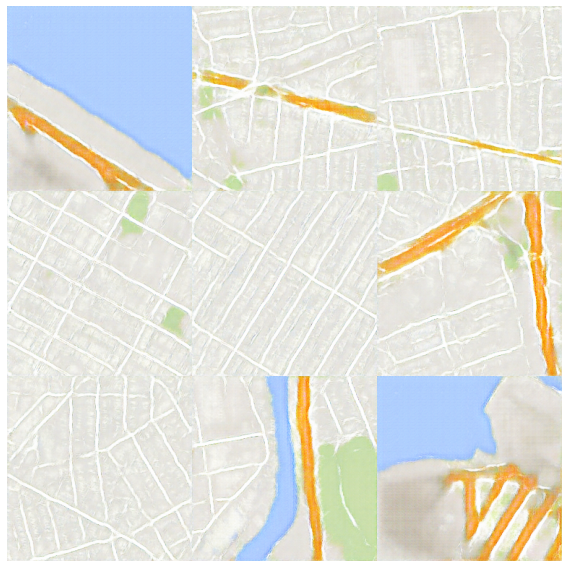

>171, d1[0.049] d2[0.014] g[11.528]


In [ ]:
train(d_model, g_model,gan_model,dataset,n_batch=64)